<a href="https://colab.research.google.com/github/sifatbhuiyan0909/dse-sentiment-cascades/blob/main/notebooks/DSE_Sentiment_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is the trailer

In [6]:
import pandas as pd
import os


save_path = '/content/drive/MyDrive/Colab Notebooks/'


lexicon_data = {
    # Bullish (Good)
    "uthbe": 0.7, "rocket": 1.0, "gamsa": 0.8, "khela hobe": 0.8, "toofan": 0.9,
    # Bearish (Bad)
    "nambe": -0.7, "dhos": -1.0, "blood-bath": -1.0, "bash-khaoya": -0.9, "panic-sell": -0.9,
    # Neutral (Steady)
    "khelche": 0.0, "sideways": 0.0, "steady": 0.05, "ghumaitese": -0.1
}


df = pd.DataFrame(list(lexicon_data.items()), columns=['word', 'sentiment_score'])


df['category'] = df['sentiment_score'].apply(
    lambda x: 'Bullish' if x >= 0.2 else ('Bearish' if x <= -0.2 else 'Neutral')
)


final_file_path = os.path.join(save_path, 'lexicon.csv')
df.to_csv(final_file_path, index=False)

print(f"Success!  Linguistic Foundation is saved at: {final_file_path}")

Success!  Linguistic Foundation is saved at: /content/drive/MyDrive/Colab Notebooks/lexicon.csv


In [7]:
!pip install sns

The Final code

of the lexicon based Sentiment scoring system

 Directory confirmed: /content/drive/MyDrive/Colab Notebooks/
 SUCCESS: Research asset saved at: /content/drive/MyDrive/Colab Notebooks/dse_lexicon_master.csv


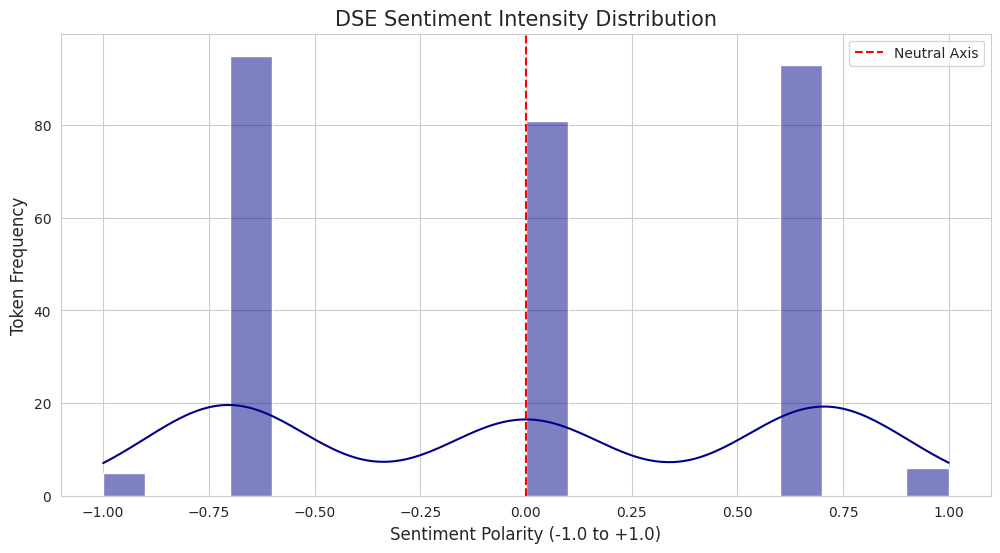

In [5]:
"""
PROJECT: DSE Sentiment Cascade Analysis
RESEARCH MODULE: Lexicon Construction, Normalization & Statistical Distribution
OBJECTIVE: Transform Banglish retail discourse into a weighted financial asset.
"""

import pandas as pd
import os
import matplotlib.pyplot as plt
import sns
import seaborn as sns
from google.colab import drive

# --- 1. RESEARCH DATA INPUT ---



BULLISH_CORPUS = """
uthbe tanbe agabe dourabe chutbe ural-dibe jumping pick-up rocket bullet
sprint lift-up uthani goti upor-mukhi high-speed push-korbe ure-jabe
dhapa-dhap tane-tane boom blast toofan bumper power-up garom agun
kapaibe strong heavy force bishal khela-hobe guti-chal jackpot breakout
gap-up upper-circuit bull-run support-nise green-candle rsi-high
golden-cross reversal accumulation volume-blast resistance-break
base-build trend-change blue-sky phulbe dhan-tana boro-mach ghorar-dour
shikhore chand-e asman-e pahar khulbe chok-choke ujan-bela joar bar-ti
shorgorom chaka-ghura ladder-up peak-mukh uth-bos shorgo haturi kari-kari
dhor-dhor buy-entry hold-profit target-high positive-vibes greed-on
fomo-rise panic-buy sera-dour long-term daily-high closing-up demand-beshi
barano uthano tahano upar-pathano khulano jora-tali daka hasano nachano
sajano agune-fela uporer-shaari dhap-uthan shokti-shali finish-high
"""

BEARISH_CORPUS = """
nambe porbe namani poton dhos nicher-mukh sliding falling niche-jabe
tola-khujche dhal ghotbe choto-hobe khaitye-jabe dubbe crash dhash-kore
thash-kore blood-bath free-fall dhum-kore phash blast-down tolaitese
dubaise khaoaise bash-khaoya chure-mara dump-kora tanking red-candle
lower-circuit gap-down correction break-down support-break dead-cat-bounce
overbought-correction rsi-drop bear-run death-cross pull-back
resistance-rejection negative-zone trend-reversal panic-sell hotasha
atke-geshi lal-batti bhoy confidence-low loss-khawa pura-lal ghum-nai
kopal-pora z-category-feeling sell-pressure exit-mara liquidation
shes-hoye-gelam pichlaitese berjal tola-nai muri-muzki fokir-hoya
rokto-nodi ondhokar pathor-poro bhat-nai borof-hola nidan-kal gorto khad
shukiye-jawa bati-gul khamchi namano dabaite-che shorano kapa-kapi
chas-deya dhub-deya ulat-palat pichone-jawa niche-thela kete-fela
jol-hoya gat-mara choto-kora mora-stock value-erosion sell-off
profit-booking unloading bear-trap wash-out deep-red market-drag
shorting namar-shuru
"""

NEUTRAL_CORPUS = """
khelche sideways steady flat dhit thame-ache ek-i-jaygay stable
nora-chora-nai shorol-rekha nishpap thitano stuck range-bound fixed
consolidation accumulation wait-and-watch base-banaitese time-pass
chupi-chupi shanti hold-e-ache next-move-er-opekkha sustho-obostha
base-camp rest-nitese pani-mapa nirupay slow-motion ghurpak hatamati
volatile-neutral up-down asha-jawya jhula dolyaman uncertain mix-signal
nara-chara kapa-kapi bouncing jol-ghola zig-zag tana-tani boring
no-trade-zone neutral-mood shorgo-morto hata-hati guti-shajano
opekkhar-pala signal-nai bose-thaka dry-market breakeven-point
low-volume sideways-trend price-tightening equilibrium neutral-gear
no-trend horizontal-move nodir-moto batash-nai adbhut-shanti bondho-duar
majh-pothe sthir achol goti-hin shatar-kata khuchra-khel dhire-susthe
nishtejo thanda-matha eka-beka pore-thaka jem-hoye-ache soman-tale
finish-neutral
"""

'''processing unit'''
def build_standardized_lexicon():
    lexicon_list = []

    # Categorical Configuration
    # (Text, Base_Score, Category_Label, Intensity_Triggers)
    configs = [
        (BULLISH_CORPUS, 0.70, 'Bullish', ['rocket', 'boom', 'blast', 'chand-e', 'upper-circuit', 'toofan']),
        (BEARISH_CORPUS, -0.70, 'Bearish', ['dhos', 'blood-bath', 'crash', 'shes-hoye-gelam', 'lower-circuit']),
        (NEUTRAL_CORPUS, 0.0, 'Neutral', [])
    ]

    for corpus, base_score, label, high_intensity_words in configs:
        words = list(set(corpus.split())) # Set removes any accidental duplicates
        for w in words:
            clean_word = w.strip().lower()

            score = base_score
            if clean_word in high_intensity_words:
                score = 1.0 if base_score > 0 else -1.0

            lexicon_list.append({
                'word': clean_word,
                'sentiment_score': score,
                'category': label
            })

    return pd.DataFrame(lexicon_list)

# --- 3. EXECUTION & SAVING ---

import os


save_path = '/content/drive/MyDrive/Colab Notebooks/'
filename = 'dse_lexicon_master.csv'

# 2. THE AUTO-REPAIR LOGIC
# This checks if the directory exists. If not, it creates it.
if not os.path.exists(save_path):
    print(f" Directory '{save_path}' not found. Creating it now...")
    os.makedirs(save_path, exist_ok=True)
else:
    print(f" Directory confirmed: {save_path}")

# 3. Save the file
full_file_path = os.path.join(save_path, filename)

try:
    df.to_csv(full_file_path, index=False, encoding='utf-8')
    print(f" SUCCESS: Research asset saved at: {full_file_path}")
except Exception as e:
    print(f" CRITICAL ERROR: Could not save file. Reason: {e}")
# --- 4. SENTIMENT DISTRIBUTION PLOT ---

def plot_research_distribution(dataframe):
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Histogram with Kernel Density Estimate
    sns.histplot(dataframe['sentiment_score'], kde=True, bins=20, color='darkblue')

    plt.title('DSE Sentiment Intensity Distribution', fontsize=15)
    plt.xlabel('Sentiment Polarity (-1.0 to +1.0)', fontsize=12)
    plt.ylabel('Token Frequency', fontsize=12)
    plt.axvline(0, color='red', linestyle='--', label='Neutral Axis')
    plt.legend()
    plt.show()

plot_research_distribution(df)

In [16]:
# Load the file we just saved to verify its contents
verification_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dse_lexicon_master.csv')

# Display the top 10 rows
print("--- PHAROS DSE LEXICON AUDIT (TOP 10) ---")
display(verification_df.head(10))

# Summary Statistics for your PhD methodology chapter
print("\n--- LEXICON SUMMARY STATISTICS ---")
print(f"Total Unique Tokens: {len(verification_df)}")
print(f"Category Counts:\n{verification_df['category'].value_counts()}")

--- PHAROS DSE LEXICON AUDIT (TOP 10) ---


,word,sentiment_score,category
0,kapaibe,0.7,Bullish
1,khulbe,0.7,Bullish
2,breakout,0.7,Bullish
3,uthano,0.7,Bullish
4,gap-up,0.7,Bullish
5,high-speed,0.7,Bullish
6,bullet,0.7,Bullish
7,shokti-shali,0.7,Bullish
8,upper-circuit,1.0,Bullish
9,kari-kari,0.7,Bullish



--- LEXICON SUMMARY STATISTICS ---
Total Unique Tokens: 280
Category Counts:
category
Bearish    100
Bullish     99
Neutral     81
Name: count, dtype: int64


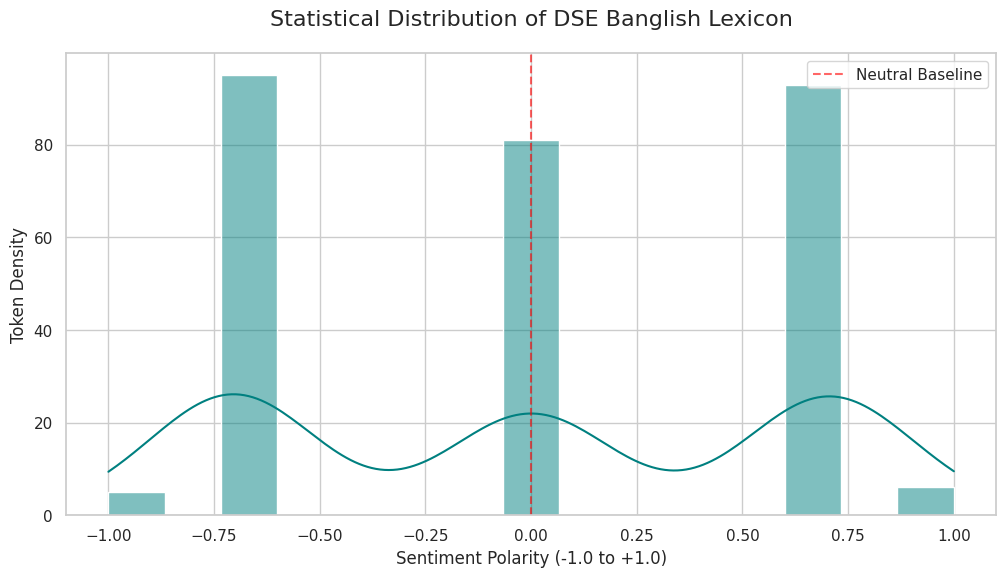

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def finalize_day_one_viz(df):

    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, 6))

    ax = sns.histplot(df['sentiment_score'], kde=True, bins=15, color='teal')


    plt.title('Statistical Distribution of DSE Banglish Lexicon', fontsize=16, pad=20)
    plt.xlabel('Sentiment Polarity (-1.0 to +1.0)', fontsize=12)
    plt.ylabel('Token Density', fontsize=12)


    plt.axvline(0, color='red', linestyle='--', alpha=0.6, label='Neutral Baseline')
    plt.legend()

    plt.show()


finalize_day_one_viz(verification_df)